In [ ]:
#Incident is image 236 in the test set (ie the model prediction for input index 235)

import tensorflow as tf
from src.nimbus_analysis.autoencoder import global_conv_autoencoder, regional_deep_conv_autoencoder
import pickle
import numpy as np

REGIONAL = True

autoencoder = tf.keras.models.load_model('regional_autoencoder.keras')

In [40]:
with open('./datasets/test_X.pickle', 'rb') as file:
    test_X = pickle.load(file)
    
if REGIONAL:
    test_X = test_X[:, 120:160, 130:170]
    
#rescale
test_X = test_X.astype('float32')/np.max(test_X)

#impute zero with median (zero exclusive)
nonzero_median = np.median(test_X[test_X > 0])
test_X[test_X == 0] = nonzero_median

In [41]:
prediction_encoded = autoencoder.encoder(test_X)
prediction_decoded = autoencoder.decoder(prediction_encoded)

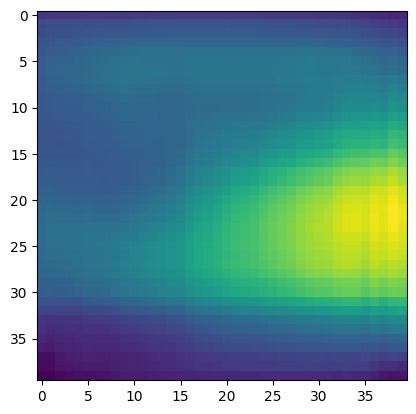

In [78]:
from matplotlib import pyplot as plt

plt.imshow(prediction_decoded[230])
plt.show()

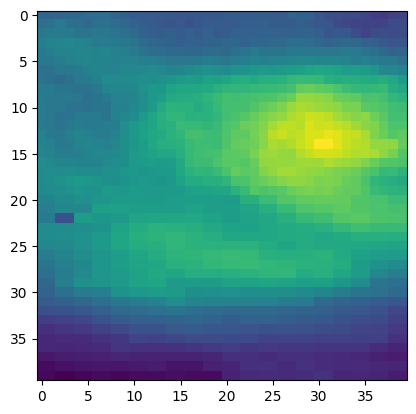

In [82]:

plt.imshow(test_X[236])


In [ ]:
#im just doing a for loop so I know I havent made a mistake
#element with index 235 would be the one of interest (result_metrics[235])


result_metrics = []
for i in range(np.shape(test_X)[0] - 1):
    
    single_result = prediction_decoded[i]
    single_result = single_result[...,0]
    
    dif = abs(single_result - test_X[i+1])
    total_error = np.sum(dif)
    result_metrics = np.append(result_metrics,total_error)

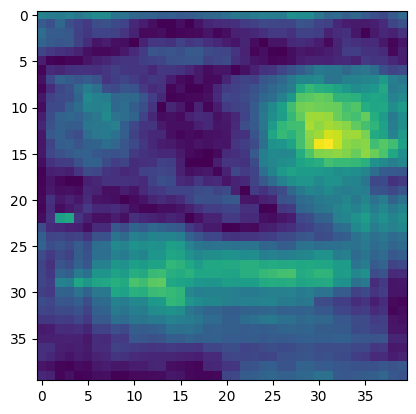

In [121]:
single_result = prediction_decoded[235]
single_result = single_result[...,0]
total_error = np.sum(dif)
dif = abs(single_result - test_X[236])
plt.imshow(dif)

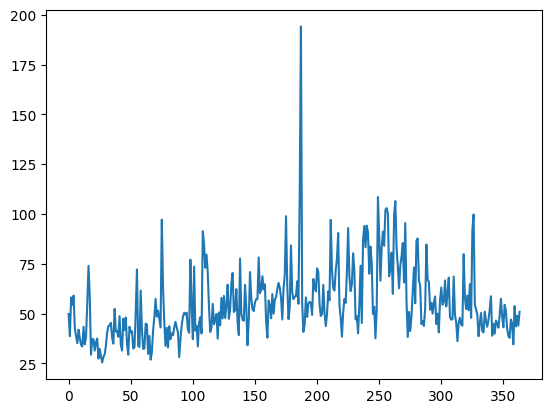

In [124]:
plt.plot(range(364), result_metrics)
plt.show()

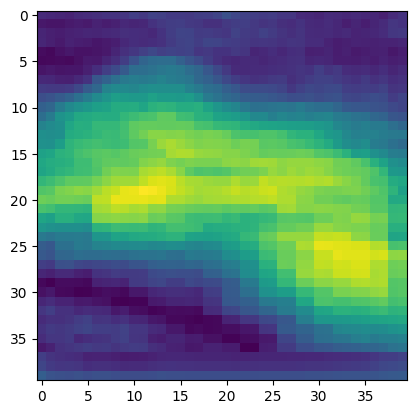

In [195]:
#plot the largest dif
#turns out it was due to missing data

np.argmax(result_metrics)
single_result = prediction_decoded[187]
single_result = single_result[...,0]
total_error = np.sum(dif)
dif = abs(single_result - test_X[188])
plt.imshow(dif)

In [181]:
#sort by metric value
#this was used to plot highest error days and spot those with missing data

np.argsort(result_metrics)

missing_data_days = [187,263,326,281,109]
result_metrics_cleaned = result_metrics

for d in missing_data_days:
    result_metrics_cleaned[d] = np.mean(result_metrics)


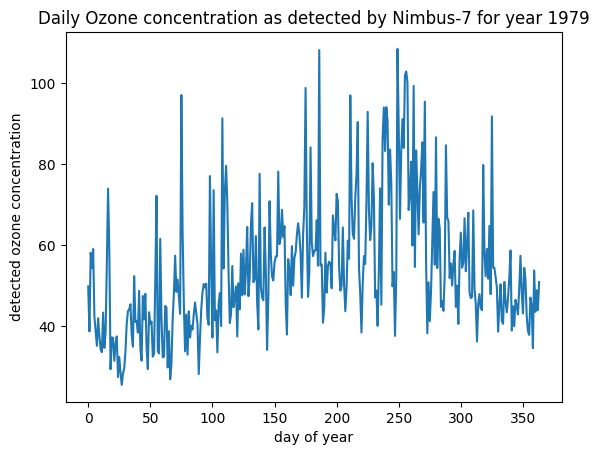

In [193]:
plt.plot(range(364), result_metrics_cleaned)
plt.xlabel('day of year')
plt.ylabel('detected ozone concentration')
plt.title('Daily Ozone concentration as detected by Nimbus-7 for year 1979')

plt.show()

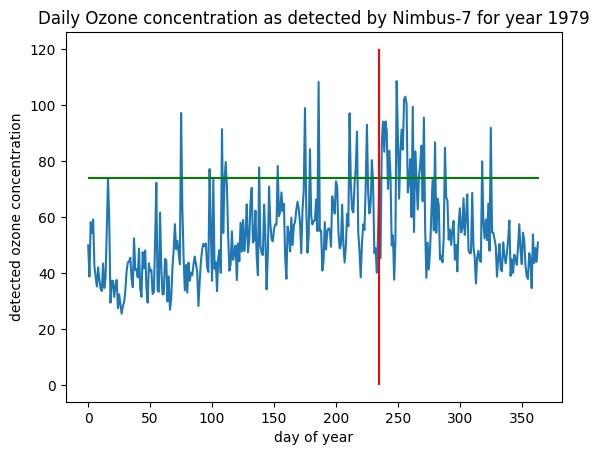

In [194]:
plt.plot(range(364), result_metrics_cleaned)
plt.hlines(74.06, 0, 364, colors='green')
plt.vlines(235, 0, 120, colors='red')
plt.xlabel('day of year')
plt.ylabel('detected ozone concentration')
plt.title('Daily Ozone concentration as detected by Nimbus-7 for year 1979')
plt.show()

In [225]:
import plotly.graph_objects as go

import pandas as pd

day = 235

# Read data from a csv
z_data = test_X[236]
min_z = np.min(z_data)
max_z = np.max(z_data)

fig = go.Figure(data=[go.Surface(z=z_data)])

fig.update_layout(title=dict(text=f'Ozone concentration for day {day}'), autosize=True,
                  width=800, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  showlegend=False)

fig.show()